In [31]:
#General Packages
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('classic')

#import pennylane as qml

#Qiskit packages
import qiskit
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA, ADAM, SLSQP
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.opflow import I, X, Y, Z, Zero, One, PauliExpectation, CircuitSampler, StateFn, DictStateFn, CircuitStateFn

In [32]:
class RandomIsing:
    """
    Stores the information of a model, which is defined by Ising bonds (J) on a 
    graph (G) with a parallel field (h).
    """
    def __init__(self,d,nqubits,localTerm=True):
        """
        d < n 
        d*n even
        """
        self.d = d
        self.nqubits = nqubits
        self.localTerm = localTerm

        self.G = nx.random_regular_graph(d,nqubits)
        self.J = {pair: 2*np.random.randint(2)-1 for pair in list(self.G.edges())}
        
        if localTerm:
            self.h = 2*np.random.randint(2,size=self.nqubits)-1
        else:
            self.h = np.zeros(self.nqubits)

    def drawGraph(self):
        return nx.draw(self.G, with_labels=True, alpha=0.8, node_size=500)

    def setCoupling(self,J):
        for pair in list(self.G.edges()):
            self.J.update({pair:J})

    
    def Hamiltonian(self):
        H = I^self.nqubits
        for pair in list(self.G.edges()):
            H += self.J.get(pair)*((I^pair[0])^Z^(I^(self.nqubits-pair[0]-1)))@((I^pair[1])^Z^(I^(self.nqubits-pair[1]-1)))
        for i in range(self.nqubits):
            H += self.h[i]*((I^i)^Z^(I^(self.nqubits-i-1)))
        H -= I^self.nqubits
        return H.reduce()
    
    def QAOA(self, p, record=False):
        """returns optimization result of QAOA and the QAOA instance"""
        callback = None
        if record:
            callback = self.callback
        solver = QAOA(COBYLA(maxiter=50000),reps=p,quantum_instance=QuantumInstance(Aer.get_backend('statevector_simulator')),initial_point=np.append(np.linspace(2,0.1,p),np.linspace(0.5,2.5,p)),callback=callback)
        res = solver.compute_minimum_eigenvalue(self.Hamiltonian())
        if res.cost_function_evals >= 50000:
            print('not converged',res)
        return res, solver

def Plotting(x_data, y_data, y_err,  x_label, y_label,title, type):
    fig,ax = plt.subplots()
    ax.errorbar(x_data, y_data, yerr= y_err, marker="o", ls="")
    if len(title)!= 0:
        ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid()
    if type== "nqubits":
        ax.set_xlim(x_data[0]-1/2, x_data[-1]+1/2)
    else:
       ax.set_xlim(0, 8) 

def ApproximateRatio(d, nqubits):
    mod= RandomIsing(d,nqubits,localTerm=True)
    np_me= NumPyMinimumEigensolver()
    res_np= np_me.compute_minimum_eigenvalue(operator= mod.Hamiltonian())
    res , solver = mod.QAOA(3) #p= 3 depth of system 
    E0= res_np.eigenvalue.real
    return  res.eigenvalue.real/E0
        

In [33]:
#if __name__ == "__main__": 
nqubits= [i+1 for i in range(3,10)]
d= [ i-1 for i in nqubits]          #connectivity
Sample_size= 10

r= np.zeros((len(nqubits), Sample_size))

for i in range(len(nqubits)):
    for j in range(Sample_size):
            r[i][j] = ApproximateRatio(d[i],nqubits[i])    

r_mean= np.mean(r, axis=1)
r_std= np.std(r, axis=1 , ddof=1)


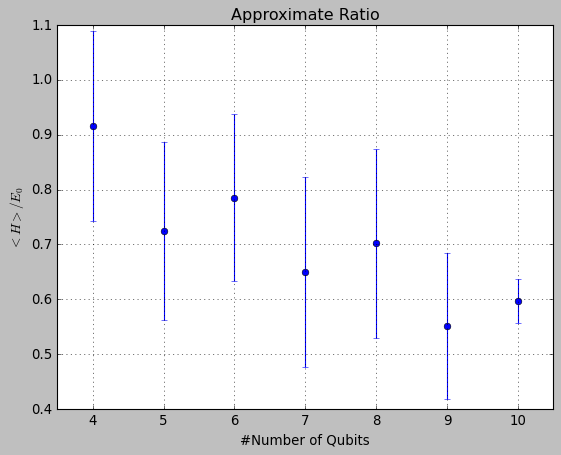

In [ ]:
Plotting(nqubits,r_mean, r_std, "#Number of Qubits", "$ <H>/E_0$" ,"Approximate Ratio","nqubits")
plt.show()

In [ ]:
print(r)
print(r_mean)
print(r_std)

[[0.58837105 0.99998481 0.99999996 0.93937811 0.99998538 0.9999805
  0.99999981 0.99998113 0.58837067 0.98445584]
 [0.54084284 0.68001752 0.6800183  0.77125865 0.6250506  0.59895546
  0.77774824 0.59302285 0.99996875 0.57141013]
 [0.99999987 0.99997346 0.72503579 0.88058199 0.72503565 0.72348336
  0.67990957 0.63602521 0.69230738 0.99999516]
 [0.77777699 0.75788359 0.66378089 0.48460511 0.74999795 0.67797603
  0.48028655 0.99999901 0.6666441  0.6257829 ]
 [0.50874303 0.60472887 0.68411694 0.65383731 0.54311411 0.52394322
  0.56084628 0.55295399 0.64907239 0.66964377]]
[0.91005073 0.68382933 0.80623474 0.68847331 0.59509999]
[0.17058234 0.13679887 0.1476081  0.15042789 0.06507222]


In [ ]:
nqubit_indv= 8
d_indv= [ nqubit_indv-(i+1) for i in range(5)]


r= np.zeros((len(d_indv),Sample_size))


for i in range(len(d_indv)):
    for j in range(Sample_size):
            #print(d_indv[i])
            r[i][j] = ApproximateRatio(d_indv[i],nqubit_indv)    


r_indv_mean= np.mean(r, axis=1)
r_indv_std= np.std(r, axis=1 , ddof=1)


7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5


capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

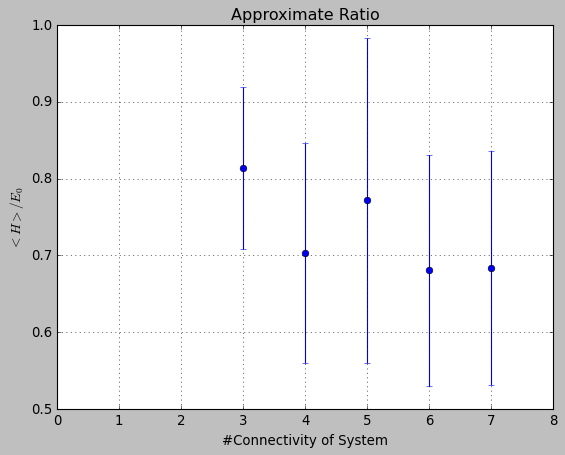

In [ ]:
Plotting(d_indv,r_indv_mean, r_indv_std, "#Connectivity of System", "$ <H>/E_0$" ,"Approximate Ratio", "connectivity")
plt.show()